In [1]:
sys.path.append("..")
import os
import utils
import plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data from Norway

In [2]:
data_daily = pd.read_csv("../data/fhi_data_daily.csv")
data_daily = data_daily[data_daily.year.astype(int) < 2021].reset_index()
data_daily = data_daily[['date', 'I_new', 'I_cumulative', 'D_new', 'D_cumulative']]
data_daily.date = data_daily['date'].apply(lambda x: 
                                        x.split("/")[1].zfill(2) + "/"
                                        + x.split("/")[0].zfill(2) + "/"
                                        + x.split("/")[2].zfill(2))
print(data_daily.head())

         date  I_new  I_cumulative  D_new  D_cumulative
0  21/02/2020    1.0           1.0    0.0           0.0
1  22/02/2020    0.0           1.0    0.0           0.0
2  23/02/2020    0.0           1.0    0.0           0.0
3  24/02/2020    0.0           1.0    0.0           0.0
4  25/02/2020    0.0           1.0    0.0           0.0


### Read output from simulations

In [3]:
relative_path = "results/200_simulations_no_vaccines_2021_06_02_20_03_22"
results = utils.read_csv(relative_path=relative_path)
new_infected_age_groups, new_deaths_age_groups = results[-3], results[-2]

Reading results ..
100%|██████████| 200/200 [00:05<00:00, 37.75it/s]


### Find cumulative cases of deaths and infected from model

In [4]:
final_deaths = new_deaths_age_groups.sum(axis=2)
final_infected = new_infected_age_groups.sum(axis=2)



In [7]:
percentile_limit=90

cumulative_deaths = final_deaths.cumsum(axis=1)
deaths_mean = final_deaths.mean(axis=0)
cumulative_deaths_mean = cumulative_deaths.mean(axis=0)
u_percentile_deaths = np.percentile(final_deaths, percentile_limit, axis=0)
l_percentile_deaths = np.percentile(final_deaths, 100-percentile_limit, axis=0)
u_percentile_deaths_cum = np.percentile(cumulative_deaths, percentile_limit, axis=0)
l_percentile_deaths_cum = np.percentile(cumulative_deaths, 100-percentile_limit, axis=0)

cumulative_infected = final_infected.cumsum(axis=1)
infected_mean = final_infected.mean(axis=0)
cumulative_infected_mean = cumulative_infected.mean(axis=0)
u_percentile_infected = np.percentile(final_infected, percentile_limit, axis=0)
l_percentile_infected = np.percentile(final_infected, 100-percentile_limit, axis=0)
u_percentile_infected_cum = np.percentile(cumulative_infected, percentile_limit, axis=0)
l_percentile_infected_cum = np.percentile(cumulative_infected, 100-percentile_limit, axis=0)

weeks = np.arange(len(infected_mean))

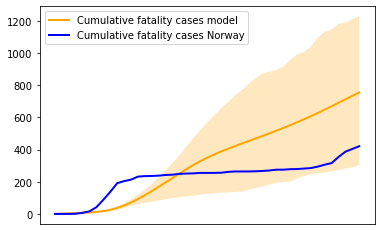

In [10]:
fig, ax = plt.subplots(1)
#ax.plot(dates, deaths_mean, lw=2, label='Deaths model', color='blue')
ax.plot(weeks, cumulative_deaths_mean, lw=2, label='Cumulative fatality cases model', color='orange')
ax.plot(weeks, data_daily.D_cumulative.to_numpy(dtype=int)[::7], lw=2, label='Cumulative fatality cases Norway', color='blue')
#ax.fill_between(dates, u_percentile_deaths, l_percentile_deaths, facecolor='blue', alpha=0.25)
ax.fill_between(weeks, u_percentile_deaths_cum, l_percentile_deaths_cum, facecolor='orange', alpha=0.25)
#ax.set_title(r'Cumulative and new deaths per week')
ax.legend(loc='upper left')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.savefig("../deaths_comparison.png")

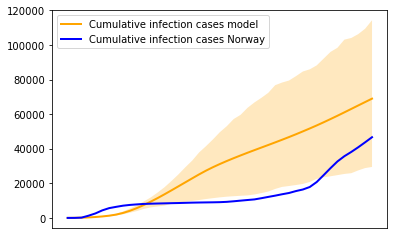

In [13]:
fig, ax = plt.subplots(1)
#ax.plot(dates, deaths_mean, lw=2, label='Deaths model', color='blue')
ax.plot(weeks, cumulative_infected_mean, lw=2, label='Cumulative infection cases model', color='orange')
ax.plot(weeks, data_daily.I_cumulative.to_numpy(dtype=int)[::7], lw=2, label='Cumulative infection cases Norway', color='blue')
#ax.fill_between(dates, u_percentile_deaths, l_percentile_deaths, facecolor='blue', alpha=0.25)
ax.fill_between(weeks, u_percentile_infected_cum, l_percentile_infected_cum, facecolor='orange', alpha=0.25)
#ax.set_title(r'Cumulative and new infected per week')
ax.legend(loc='upper left')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.savefig("../infected_comparison.png")